In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "C:/Users/Dhanush/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt",
    sep=';',
    low_memory=False
)

In [2]:
# Sub_metering_1: Energy used by the kitchen 
# (e.g., dishwasher, microwave, fridge)

# Sub_metering_2: Energy used by the laundry room 
# (e.g., washing machine, dryer)

# Sub_metering_3: Energy used by climate control 
#    (e.g., water heater, air conditioning)


In [3]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(columns=['Date', 'Time'], inplace=True)


C:\Users\Dhanush\AppData\Local\Temp\ipykernel_3548\4096498463.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [4]:
df['Sub_metering_3'] = df['Sub_metering_3'].fillna('0')

In [5]:
print(df.dtypes)
print(df.columns) 
print(df.isnull().sum())

Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                   object
datetime                 datetime64[ns]
dtype: object
Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime'],
      dtype='object')
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
dtype: int64


In [6]:
df['Global_active_power'].unique

<bound method Series.unique of 0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
2075254    0.946
2075255    0.944
2075256    0.938
2075257    0.934
2075258    0.932
Name: Global_active_power, Length: 2075259, dtype: object>

In [7]:
df.head(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00


In [8]:
numeric = ('Global_active_power', 'Global_reactive_power', 'Voltage',
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3')

# First replace '?' with NaN
df.replace('?', 0, inplace=True)

# Convert each selected column to float
for col in numeric:
    df[col] = df[col].astype(float)


In [9]:
print(df.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
dtype: int64


In [10]:
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

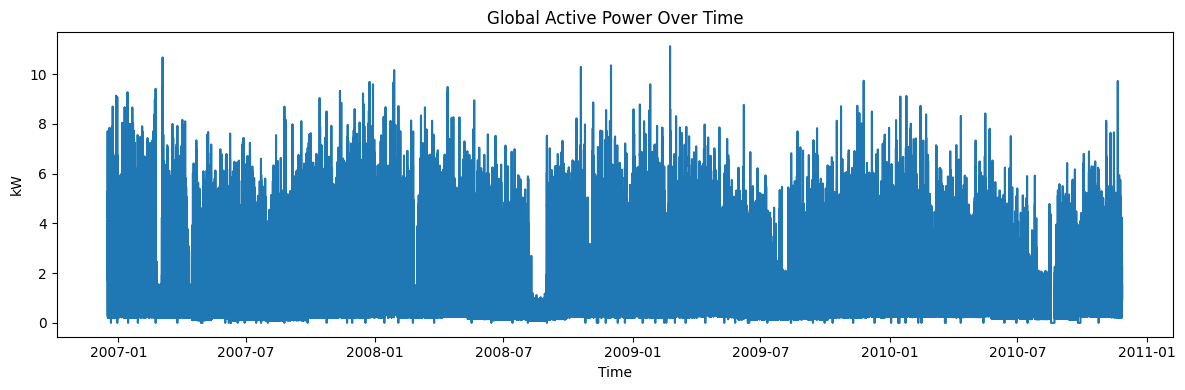

In [11]:
import matplotlib.pyplot as plt

# Plot global active power over time
plt.figure(figsize=(12, 4))
plt.plot(df['datetime'], df['Global_active_power'])
plt.title("Global Active Power Over Time")
plt.xlabel("Time")
plt.ylabel("kW")
plt.tight_layout()
plt.show()


In [12]:
print(df.describe())
print(df.isnull().sum())
print(df.dtypes)


       Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.077950e+00           1.221658e-01  2.378249e+02   
min           0.000000e+00           0.000000e+00  0.000000e+00   
25%           3.040000e-01           4.600000e-02  2.388900e+02   
50%           5.780000e-01           1.000000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   
std           1.057642e+00           1.128556e-01  2.697024e+01   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06   
mean       4.569827e+00    1.107879e+00    1.282265e+00    6.377598e+00   
min        0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
50%        2.600000e+

In [13]:
numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3', 'hour', 'dayofweek', 'month', 'year', 'is_weekend'
]


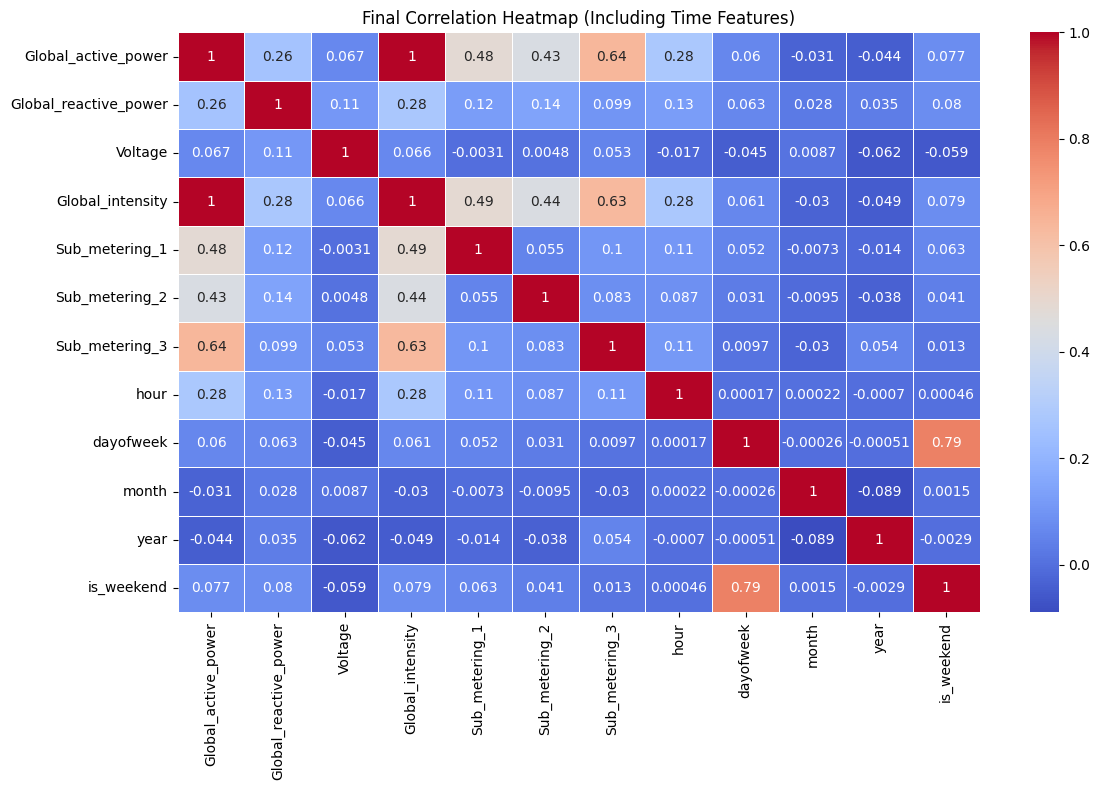

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Final Correlation Heatmap (Including Time Features)')
plt.tight_layout()
plt.show()


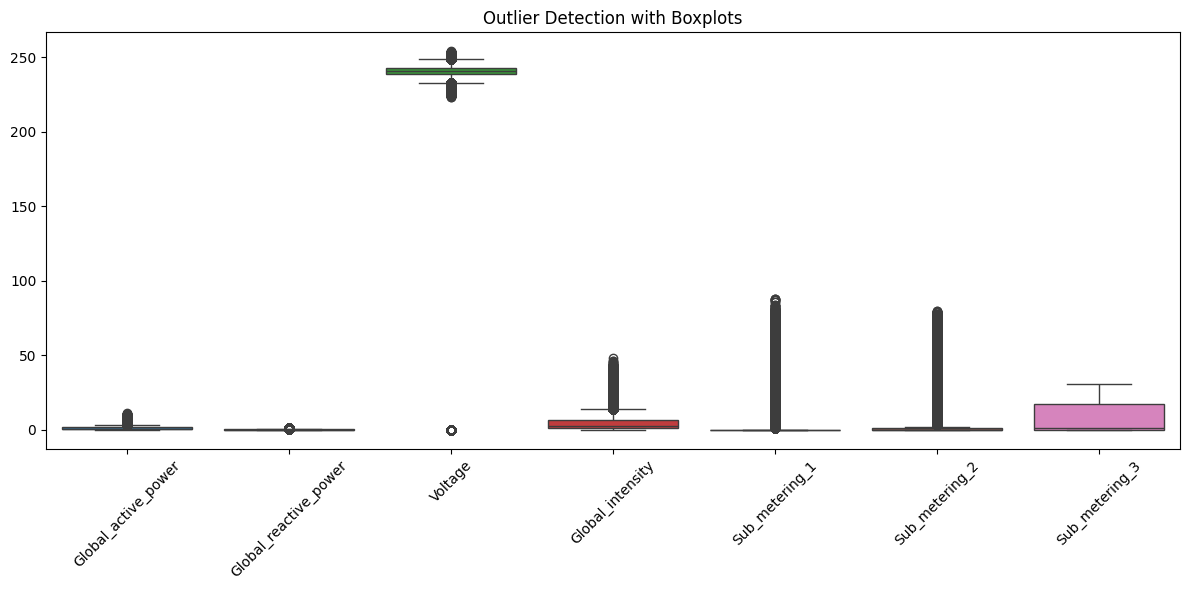

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only true continuous numeric columns
continuous_cols = [
    'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[continuous_cols])
plt.title("Outlier Detection with Boxplots")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
from scipy.stats import zscore
import numpy as np
#energy soucre project removing outliear is changing model buliding  
continuous_cols = [
    'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

# Calculate Z-scores
z_scores = np.abs(zscore(df[continuous_cols]))

# Define threshold for being an outlier (commonly 3)
threshold = 3

# Create a boolean DataFrame for outliers
outliers = (z_scores > threshold)

# Print how many outliers per column
print("Outlier count per column (Z-Score method):")
print(outliers.sum())


Outlier count per column (Z-Score method):
231583


In [17]:
df['date'] = df['datetime'].dt.date

# List of numeric columns
numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

# Create daily average columns
for col in numeric_cols:
    df[f'{col}_daily_avg'] = df.groupby('date')[col].transform('mean')

df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

df = df.sort_values('datetime')
df['power_rolling_3h'] = df['Global_active_power'].rolling(window=3).mean()
df['power_rolling_6h'] = df['Global_active_power'].rolling(window=6).mean()



In [18]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,hour,dayofweek,...,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Global_intensity_daily_avg,Sub_metering_1_daily_avg,Sub_metering_2_daily_avg,Sub_metering_3_daily_avg,is_peak_hour,power_rolling_3h,power_rolling_6h
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,5,...,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,0,NaN,NaN
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,5,...,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,0,NaN,NaN
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,5,...,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,0,4.983333,NaN
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,17,5,...,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,0,5.374000,NaN
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,17,5,...,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,0,4.809333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,20,4,...,1.178230,0.095666,240.291029,4.956295,0.855107,0.304830,7.908947,1,0.944667,0.945000
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,20,4,...,1.178230,0.095666,240.291029,4.956295,0.855107,0.304830,7.908947,1,0.945333,0.945000
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,21,4,...,1.178230,0.095666,240.291029,4.956295,0.855107,0.304830,7.908947,1,0.942667,0.943667
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,21,4,...,1.178230,0.095666,240.291029,4.956295,0.855107,0.304830,7.908947,1,0.938667,0.941667


In [19]:
#first model======> linear regersion 

In [20]:
df.isnull().sum()

Global_active_power                0
Global_reactive_power              0
Voltage                            0
Global_intensity                   0
Sub_metering_1                     0
Sub_metering_2                     0
Sub_metering_3                     0
datetime                           0
hour                               0
dayofweek                          0
month                              0
year                               0
is_weekend                         0
date                               0
Global_active_power_daily_avg      0
Global_reactive_power_daily_avg    0
Voltage_daily_avg                  0
Global_intensity_daily_avg         0
Sub_metering_1_daily_avg           0
Sub_metering_2_daily_avg           0
Sub_metering_3_daily_avg           0
is_peak_hour                       0
power_rolling_3h                   2
power_rolling_6h                   5
dtype: int64

In [21]:
df = df.dropna(subset=['power_rolling_3h', 'power_rolling_6h'])

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

class EnergyConsumptionModel:
    def __init__(self, df, target='Global_active_power'):
        self.features = [
            'hour', 'dayofweek', 'is_weekend',
            'Global_reactive_power', 'Voltage',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Global_active_power_daily_avg', 'Global_reactive_power_daily_avg',
            'Sub_metering_1_daily_avg', 'Sub_metering_2_daily_avg', 'Sub_metering_3_daily_avg'
        ]

        self.X = df[self.features]
        self.y = df[target]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

        self.models = {
            "Linear Regression": LinearRegression(),
            "Random Forest": RandomForestRegressor(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42),
            "Gradient Boosting": GradientBoostingRegressor(n_estimators=30, max_depth=5, random_state=42)
        }

    def train_and_evaluate(self):
        for name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            preds = model.predict(self.X_test)

            # Print Evaluation Metrics
            print(f"{name} - MAE: {mean_absolute_error(self.y_test, preds):.4f}, "
                  f"RMSE: {np.sqrt(mean_squared_error(self.y_test, preds)):.4f}, "
                  f"R²: {r2_score(self.y_test, preds):.4f}")

            # Scatter Plot for First 50 Predictions
            plt.figure(figsize=(6, 3))
            plt.scatter(range(50), self.y_test[:50], label='Actual', color='blue')
            plt.scatter(range(50), preds[:50], label='Predicted', color='red')
            plt.xlabel("Sample Index (0-49)")
            plt.ylabel("Value")
            plt.title(name)
            plt.legend()
            plt.tight_layout()
            plt.grid(True)
            plt.show()


Linear Regression - MAE: 0.3092, RMSE: 0.4697, R²: 0.8029


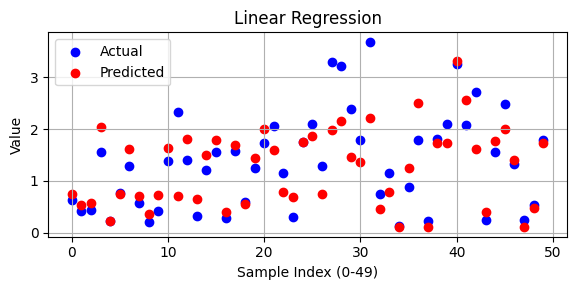

Random Forest - MAE: 0.2376, RMSE: 0.3950, R²: 0.8606


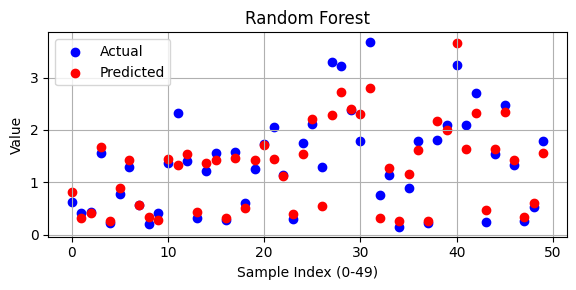

Gradient Boosting - MAE: 0.2672, RMSE: 0.4206, R²: 0.8419


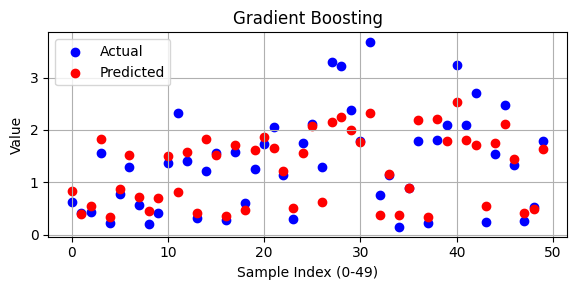

In [23]:
model_runner = EnergyConsumptionModel(df)

# Train and evaluate the models 
results = model_runner.train_and_evaluate()


In [24]:
features =[
            'hour', 'dayofweek', 'is_weekend',
            'Global_reactive_power', 'Voltage',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Global_active_power_daily_avg', 'Global_reactive_power_daily_avg',
            'Sub_metering_1_daily_avg', 'Sub_metering_2_daily_avg', 'Sub_metering_3_daily_avg'
        ]

In [25]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features and target
X = df[features]
y = df['Global_active_power']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1)

# Predict
y_pred = model.predict(X_test).flatten()

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nNeural Network:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


C:\Users\Dhanush\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.3164
Epoch 2/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1616
Epoch 3/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - loss: 0.1540
Epoch 4/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 0.1509
Epoch 5/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1491
Epoch 6/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.1463
Epoch 7/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.1448
Epoch 8/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.1432
Epoch 9/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.1431
Epoch 10/10
6486/6486 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.1420
12971/12971 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step

Neural Network:
MAE:  0.2292
RMSE: 0.3777
R²:   0.8725


In [26]:
#  Insights:
# 1. Neural Network gave the best performance overall (R² = 0.87, lowest RMSE).
# 2. Random Forest also performed well (R² = 0.86) with lower MAE than NN — good alternative.
# 3. Gradient Boosting was close behind (R² = 0.84), but slightly more error.
# 4. Linear Regression was the weakest (R² = 0.80) — can't capture complex patterns.
# 5. Time-based and sub-met    ering features are key influencers of energy usage.

#  Recommendations:
#  Use Neural Network for best accuracy, or Random Forest for interpretability.
#  Ensure time-of-day and sub-metering values are well-engineered.
#  Visualize prediction vs. actual regularly to monitor performance.
#  Explore adding temperature, occupancy, or appliance data for improved predictions.
